In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['class labels','alcohol','malic acid']
df.head()

,class labels,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

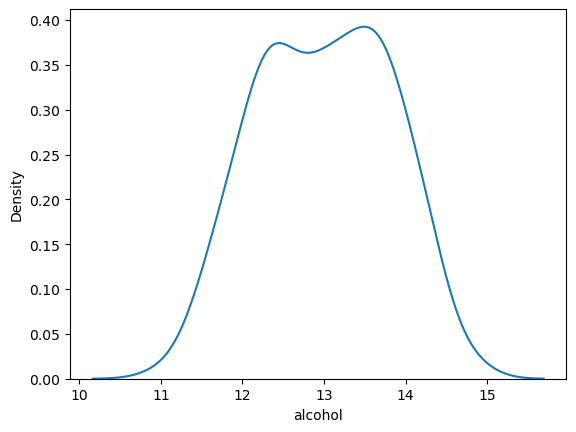

In [13]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

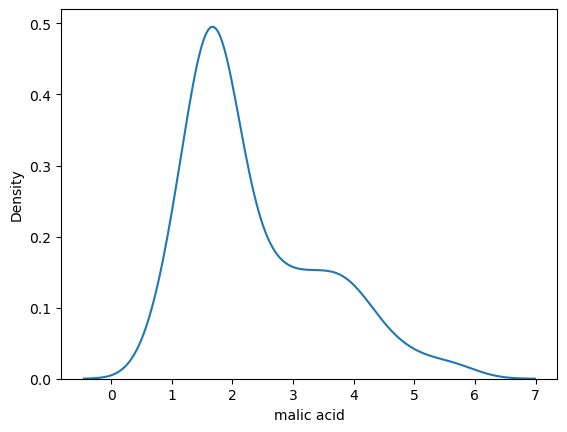

In [27]:
sns.kdeplot(df['malic acid'])

<Axes: xlabel='alcohol', ylabel='malic acid'>

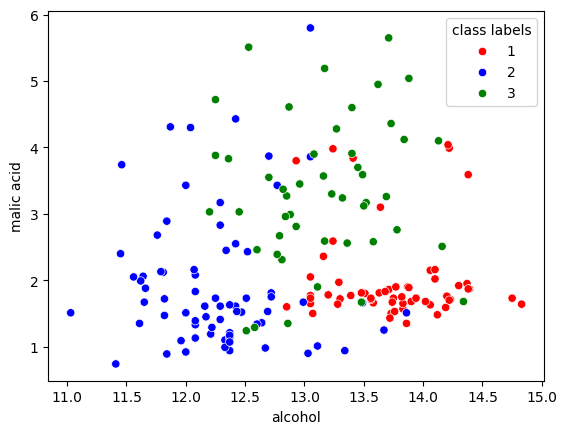

In [33]:
color_dict = {1: 'red', 2: 'blue', 3: 'green'}
sns.scatterplot(x=df['alcohol'], y=df['malic acid'], hue=df['class labels'], palette=color_dict)


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('class labels',axis=1), df['class labels'],test_size=0.3, random_state=0 )

x_train.shape,x_test.shape

((124, 2), (54, 2))

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [45]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [47]:
np.round(x_train.describe(),1)

,alcohol,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [49]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


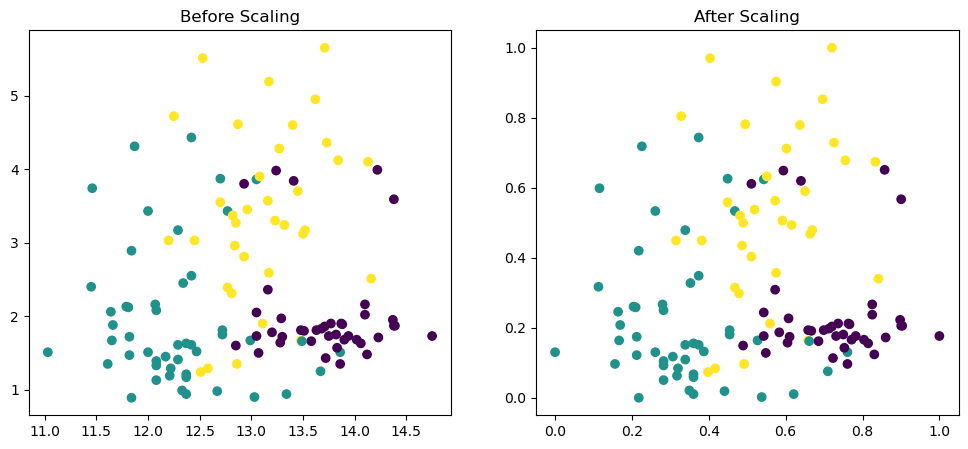

In [57]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['alcohol'],x_train['malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic acid'], c=y_train)
ax2.set_title("After Scaling")

plt.show()

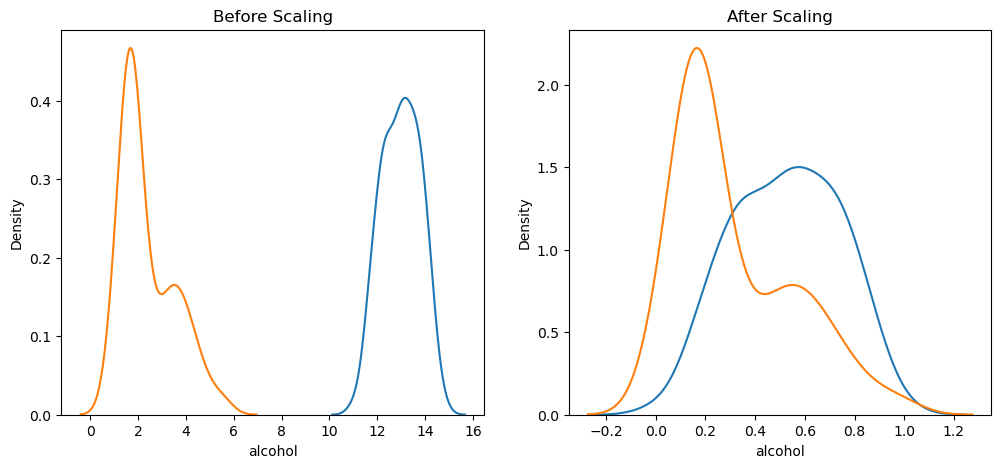

In [63]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['malic acid'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['malic acid'], ax=ax2)

plt.show()

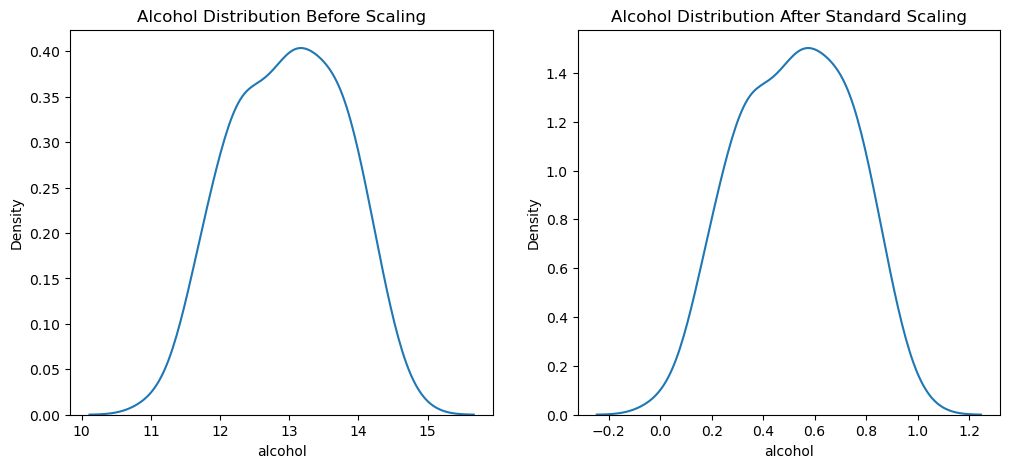

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
plt.show()

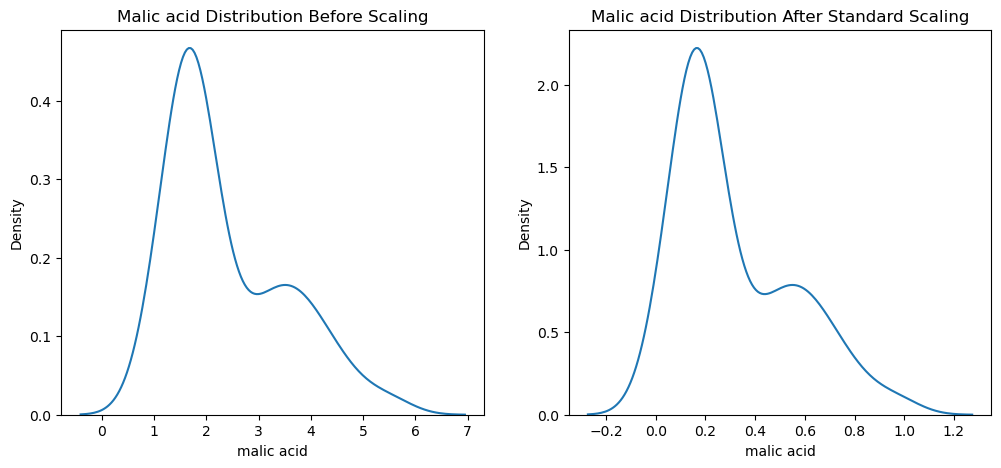

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['malic acid'], ax=ax2)
plt.show()